In [4]:
TN=242
FP=802
FN=437
TP=2052


#Senstivity  true positve rate
Senstivity =TP/(TP+FN)
print("Senstivity is " )
print( Senstivity)
#Specificity( false positve rate ) 
Specificity = TN/(TN+FP)
print ("Specificity is " )
print ( Specificity)

Senstivity is 
0.8244274809160306
Specificity is 
0.23180076628352492


In [5]:
val1=3002666
val2=4447581
val3=4634047

avg=(val1+val2+val3)/3
avgall=3702528.22
print(avg)
sindex=avg/avgall
print(sindex)

4028098.0
1.087931748431076


In [6]:
Yi=25
Bconst=29.490
B1=.891
d=Yi-Bconst
Yt=B1*(Yi-Bconst)+Bconst

print(Yt)


seasonality =1.171953255
print (Yt*seasonality)


25.48941
29.87239701752955


In [7]:
R=.650
print(R*R)

0.42250000000000004


In [8]:
Yi=100
Bconst=75.326
B1=.839
d=Yi-Bconst
Yt=B1*d+Bconst
Avg=74.875
print(Yt)

Fdt=Bconst+B1*Avg
seasonality =1.171953255
print (Yt*seasonality)
print (Fdt)

96.027486
112.53972478716693
138.14612499999998


In [9]:
#binomial distribution  ,its used only if possible outcome is success and failure

#The binomial distribution is a discrete probability distribution and has several applications in many business contexts. A random variable X is said to follow a binomial distribution when:
#• The random variable can have only two outcomes − success and failure (also known as Bernoulli trials).
#• The objective is to find the probability of getting x successes out of n trials.
#• The probability of success is p and thus the probability of failure is (1 − p).
#• The probability p is constant and does not change between trials.

#if probabilty of customer on an average who return the item is 3%, what is probability that exactly #5 item will return the time ,
from scipy import stats
# here we will calculate the pmf
Totalnoofsamples=20
probabilityofsucessof1sample =.1
quantity=5

stats.binom.pmf(quantity,Totalnoofsamples,probabilityofsucessof1sample)*100


3.1921361119954423

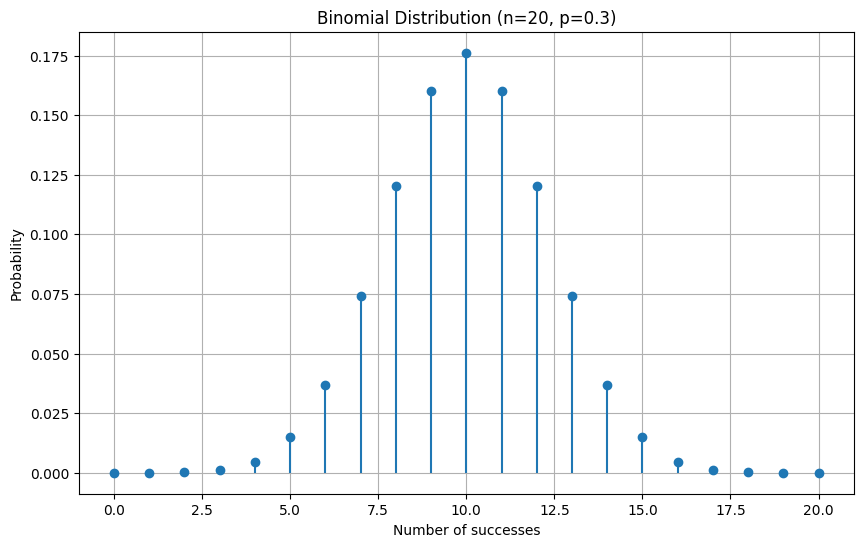

In [10]:
#lets plot the distribution of binomial for all the quantity, and variance on probability
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom


# Parameters
n = 20  # Number of trials
p = 0.5  # Probability of success

# Possible outcomes (0 to n)
x = np.arange(0, n + 1)

# Binomial distribution
binom_pmf = binom.pmf(x, n, p)

# Plotting
plt.figure(figsize=(10, 6))
plt.stem(x, binom_pmf, basefmt=" ")
plt.xlabel('Number of successes')
plt.ylabel('Probability')
plt.title('Binomial Distribution (n=20, p=0.3)')
plt.grid(True)
plt.show()

In [11]:
#lets plot the distribution of binomial for all the quantity 
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

#if probabilty of customer on an average who return the item is 3%, what is probability that more than 5, return the item. 

#here we will calulate the cdf for 5 and subtract from 1
Totalnoofsamples=20
probabilityofsucessof1sample =.1
quantity=5
1-binom.cdf(quantity,Totalnoofsamples,probabilityofsucessof1sample)


0.011253134164509015

In [12]:
#average no of customers who will return the item
#average=n*p
#variance=n*p*(1-p)
Totalnoofsamples=20
probabilityofsucessof1sample =.1
quantity=5
binom.stats(quantity,Totalnoofsamples,probabilityofsucessof1sample)
avg=Totalnoofsamples*probabilityofsucessof1sample
variance=Totalnoofsamples*probabilityofsucessof1sample*(1-probabilityofsucessof1sample)
print (avg, variance)

2.0 1.8


In [13]:
# Poisson distribution When we have to find the probability of number of events,
# we use Poisson distribution.

#if call rate in call centre is 20 /h, whats the prob that its max 5
calllambda=10
noofcall=5
stats.poisson.cdf(noofcall,calllambda)*100

#no of calls over 3 hour period will be greater than 25
noofcall=25
(1-stats.poisson.cdf(noofcall,calllambda*3))*100

79.1642635332667

In [14]:
#Exponential distribution
# Now, few examples of exponential distribution;
# the time to failure of an avionic system
# follows an exponential distribution
# with a mean time between failures is 1000 hours.
# So, lambda will be 1 divided by 1000.
# Now, calculate the probability
# that the system will not fail before 2000 hour

from scipy import stats

scale=1000
λ=1/1000

t=2000
(1-stats.expon.cdf(t,λ,scale))*100


#time by which 10% will fail
p=.1
print(stats.expon.ppf(p,λ,scale))

print(1-stats.expon.cdf(15,1/15,15))

105.36151565782632
0.36951809967594607


In [15]:
#normal distribution , guasian distribution, bell curve. 

import pandas as pd
indigodataframe=pd.read_excel('../inputdata/indigo.xlsx')

titiandataframe=pd.read_csv('../inputdata/Titan.csv')
indigodf=indigodataframe[['TIMESTAMP','CLOSE']]
titandf=titiandataframe[['TIMESTAMP','CLOSE']]


#set the date time index
indigodf= indigodf.set_index(pd.DatetimeIndex(indigodf['TIMESTAMP']))
titandf= titandf.set_index(pd.DatetimeIndex(titandf['TIMESTAMP']))
indigodf.head(5)

,TIMESTAMP,CLOSE
TIMESTAMP,,
2023-01-02,02-JAN-2023,2042.75
2023-01-03,03-JAN-2023,2040.95
2023-01-04,04-JAN-2023,2003.10
2023-01-05,05-JAN-2023,2037.55
2023-01-06,06-JAN-2023,2020.00


Text(0, 0.5, 'Close price')

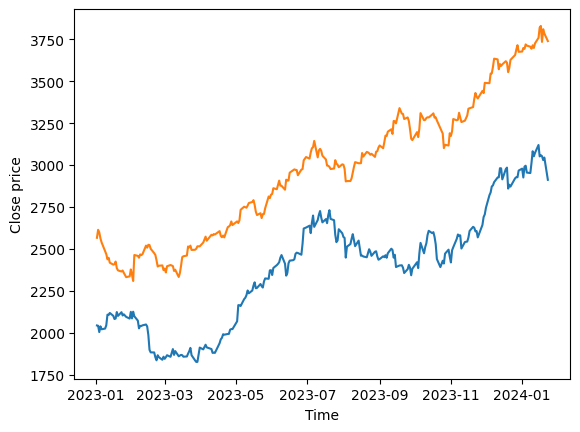

In [16]:
import matplotlib.pyplot as plt
import seaborn as sb

plt.plot(indigodf.CLOSE)
plt.xlabel('Time')
plt.ylabel("Close price")


plt.plot(titandf.CLOSE)
plt.xlabel('Time')
plt.ylabel("Close price")

Text(0, 0.5, 'Gain')

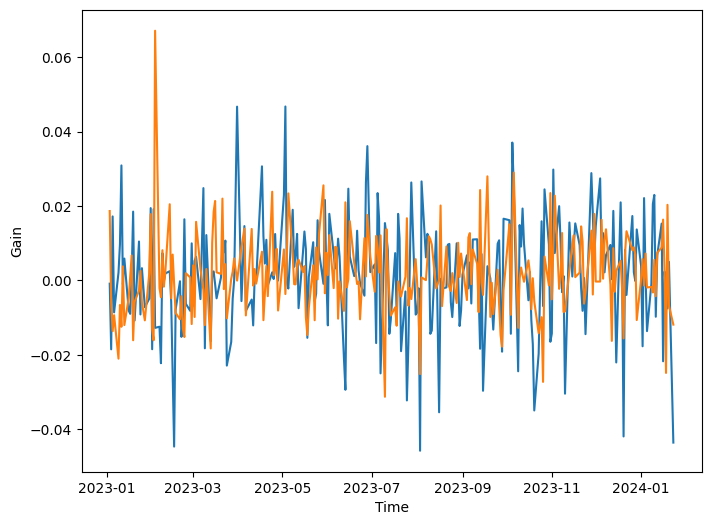

In [17]:
import matplotlib.pyplot as plt
import seaborn as sb

indigodf['GAIN']=indigodf.CLOSE.pct_change(periods=1)
titandf['GAIN']=titandf.CLOSE.pct_change(periods=1)
indigodf.head(5)

plt.figure(figsize=(8,6))
plt.plot(indigodf['GAIN'])#,titandf['GAIN'])
plt.xlabel('Time')
plt.ylabel("Gain")


plt.plot(titandf['GAIN'])#,titandf['GAIN'])
plt.xlabel('Time')
plt.ylabel("Gain")



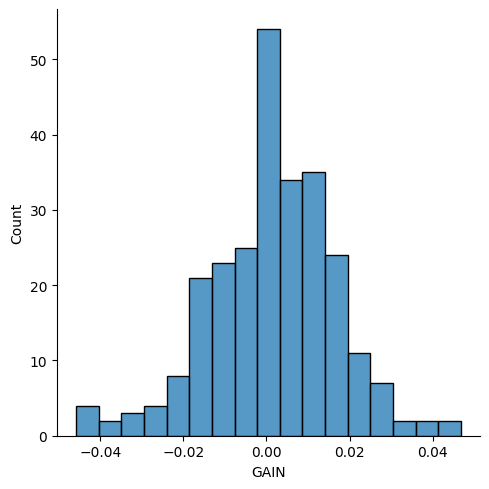

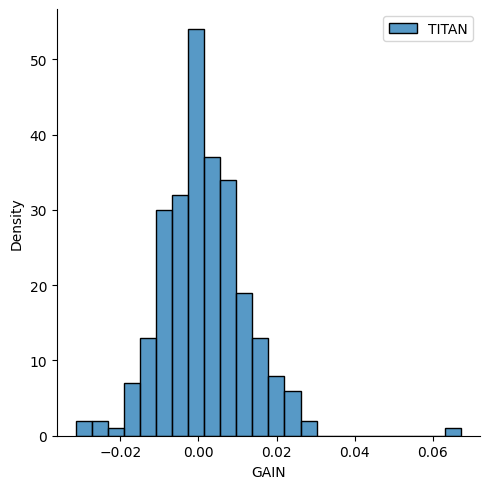

In [18]:
import seaborn as sn 

sn.displot(indigodf.GAIN, label ="INDIGO")
sn.displot(titandf.GAIN,label="TITAN")
plt.xlabel("GAIN")
plt.ylabel("Density")
plt.legend();

In [19]:
# Mean and variance
mean =indigodf.GAIN.mean()
sd=indigodf.GAIN.std()
print("indigo",mean, sd)

mean = titandf.GAIN.mean()
sd=titandf.GAIN.std()

print("titan" , mean, sd)

indigo 0.0014736032163440054 0.01515276768871642
titan 0.0015047784121541116 0.011040124830971599


In [20]:
#for 95% time what is the gain probabaliyt range
#Cummulative distribution 

# To find out what is the expected range of return for 95% confidence interval, we need to calculate the values gain for two standard deviation away from the mean on both sides of the distribution i.e. 
# 𝜇±2𝜎.
# For advanced statistical analysis, we can use Python library scipy.stats. The library contains sub-packages for analyzing different distributions. For example, methods to analyze normal distribution are given by stats. norm. The interval() method of stats.norm gives the confidence interval for a normal distribution.
# stats.norm.interval() takes three parameters:
# 1. alpha: It is the interval, for example, 0.9 for 90% confidence interval.
# 2. loc: It is the location parameter of the distribution. It is mean for normal distribution.
# 3. scale: It is the scale parameter of the distribution. It is the standard deviation for normal distribution.

from scipy import stats

stats.norm.interval(.95,loc=titandf['GAIN'].mean(),scale=titandf['GAIN'].std())


# to find the probability of making the gain of more than 2%
print("titan probability of more than 2% loss",stats.norm.cdf(-.02,loc=titandf['GAIN'].mean(),scale=titandf['GAIN'].std())*100)

# to find the probability of making the loss of more than 2%
print("indigodf probability of more than 2% loss",(stats.norm.cdf(-.02,loc=indigodf['GAIN'].mean(),scale=indigodf['GAIN'].std()))*100)

print("indigo probability of more than 2% gain",(1-stats.norm.cdf(.02,loc=indigodf['GAIN'].mean(),scale=indigodf['GAIN'].std()))*100)

# to find the probability of making the gain of more than 2%
print("titan probability of more than 2% gain",(1-stats.norm.cdf(.02,loc=titandf['GAIN'].mean(),scale=titandf['GAIN'].std()))*100)



titan probability of more than 2% loss 2.571498662776732
indigodf probability of more than 2% loss 7.822090329126226
indigo probability of more than 2% gain 11.07326383828202
titan probability of more than 2% gain 4.694035315213552


1 test result TtestResult(statistic=3.0983866769659336, pvalue=0.053362722716941896, df=3)
2 test result TtestResult(statistic=-0.8164965809277261, pvalue=0.42789151356756483, df=14.0)  p value less then .05 means they are significantly different 
chi 2 test result Power_divergenceResult(statistic=48.0, pvalue=3.7751345442790964e-11)   p value less then .05 means they are significantly different
anova F_onewayResult(statistic=14.977980665950604, pvalue=0.0007242951627742894)   p value less then .05 means they are significantly different


/var/folders/fl/jjn6m41x5390r7wk1j906b2c0000gr/T/ipykernel_31309/612854207.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(sample1, label="sample 1")
/var/folders/fl/jjn6m41x5390r7wk1j906b2c0000gr/T/ipykernel_31309/612854207.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(sample2, label=

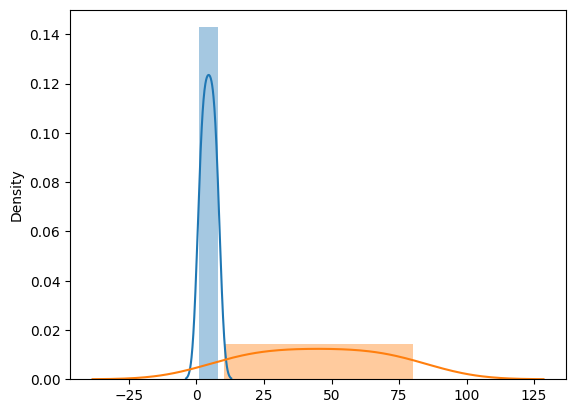

In [27]:
# Hypothesis Test: 
# The hypothesis is a claim and the objective of hypothesis testing is to either reject or retain a null hypothesis (current belief) with the help of data. Hypothesis testing consists of two complementary statements called null hypothesis and alternative hypothesis. Null hypothesis is an existing belief and alternate hypothesis is what we intend to establish with new evidence (samples).
# Hypothesis tests are broadly classified into parametric tests and non-parametric tests. Parametric tests are about population parameters of distribution such as mean, proportion, standard deviation, etc., whereas non-parametric tests are not about parameters, but about other characteristics such as independence of events or data following certain distributions such as normal distribution.
import seaborn as sn

#	One-Sample T-Test:
#  The t-test is used when the population standard deviation S is unknown (and hence estimated from the sample) and is estimated from the sample. The expected value (mean) of a sample of independent observations is equal to the given population mean.
 
from scipy import stats

sample =[1,2,3,4]
expectedvalue=.5
printvalue=stats.ttest_1samp(sample,expectedvalue)
print(f"1 test result {printvalue}")
# 	Two-Sample T-Test:
# A two-sample t-test is required to test the difference between two population means where standard deviations are unknown. The parameters are estimated from the samples.
sample1 =[1,2,3,4,5,6,7,8]
sample3 =[2,3,4,5,6,7,8,9]
sample2 =[10,20,30,40,50,60,70,80]

sn.distplot(sample1, label="sample 1")
sn.distplot(sample2, label= "sample2")
stats.ttest_ind(sample1, sample3)
print("2 test result",stats.ttest_ind(sample1, sample3)," p value less then .05 means they are significantly different ")


# Chi-Square Goodness of Fit Test: 

# The Chi-square goodness of fit test is a non-parametric test used for comparing the observed distribution of data with the expected distribution of the data to decide whether there is any statistically significant difference between the observed distribution and theoretical distribution.
sample1=[30,40,30]
sample2=[10,40,50]
result =stats.chisquare(sample1,sample2)

print ("chi 2 test result",result,"  p value less then .05 means they are significantly different")


# ANOVA:

# Sometimes it may be necessary to conduct a hypothesis test to compare mean values simultaneously for more than two groups (samples) created using a factor (or factors). For example, a marketer may like to understand the impact of three different discount values (such as 0%, 10%, and 20% discount) on the average sales.

# One-way ANOVA can be used to study the impact of a single treatment (also known as a factor) at different levels (thus forming different groups) on a continuous response variable (or outcome variable).

oneway =stats.f_oneway(sample1,sample2,sample3)
print ("anova",oneway,"  p value less then .05 means they are significantly different")


1 test result TtestResult(statistic=3.0983866769659336, pvalue=0.053362722716941896, df=3)
2 test result TtestResult(statistic=-0.8164965809277261, pvalue=0.42789151356756483, df=14.0)  p value less then .05 means they are significantly different 
chi 2 test result Power_divergenceResult(statistic=48.0, pvalue=3.7751345442790964e-11)   p value less then .05 means they are significantly different
anova F_onewayResult(statistic=14.977980665950604, pvalue=0.0007242951627742894)   p value less then .05 means they are significantly different


/var/folders/fl/jjn6m41x5390r7wk1j906b2c0000gr/T/ipykernel_31309/612854207.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(sample1, label="sample 1")
/var/folders/fl/jjn6m41x5390r7wk1j906b2c0000gr/T/ipykernel_31309/612854207.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(sample2, label=

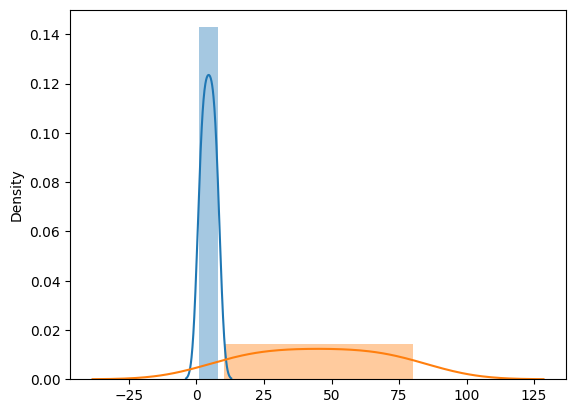

In [ ]:
# Hypothesis Test: 
# The hypothesis is a claim and the objective of hypothesis testing is to either reject or retain a null hypothesis (current belief) with the help of data. Hypothesis testing consists of two complementary statements called null hypothesis and alternative hypothesis. Null hypothesis is an existing belief and alternate hypothesis is what we intend to establish with new evidence (samples).
# Hypothesis tests are broadly classified into parametric tests and non-parametric tests. Parametric tests are about population parameters of distribution such as mean, proportion, standard deviation, etc., whereas non-parametric tests are not about parameters, but about other characteristics such as independence of events or data following certain distributions such as normal distribution.
import seaborn as sn

#	One-Sample T-Test:
#  The t-test is used when the population standard deviation S is unknown (and hence estimated from the sample) and is estimated from the sample. The expected value (mean) of a sample of independent observations is equal to the given population mean.
 
from scipy import stats

sample =[1,2,3,4]
expectedvalue=.5
printvalue=stats.ttest_1samp(sample,expectedvalue)
print(f"1 test result {printvalue}")
# 	Two-Sample T-Test:
# A two-sample t-test is required to test the difference between two population means where standard deviations are unknown. The parameters are estimated from the samples.
sample1 =[1,2,3,4,5,6,7,8]
sample3 =[2,3,4,5,6,7,8,9]
sample2 =[10,20,30,40,50,60,70,80]

sn.distplot(sample1, label="sample 1")
sn.distplot(sample2, label= "sample2")
stats.ttest_ind(sample1, sample3)
print("2 test result",stats.ttest_ind(sample1, sample3)," p value less then .05 means they are significantly different ")


# Chi-Square Goodness of Fit Test: 

# The Chi-square goodness of fit test is a non-parametric test used for comparing the observed distribution of data with the expected distribution of the data to decide whether there is any statistically significant difference between the observed distribution and theoretical distribution.
sample1=[30,40,30]
sample2=[10,40,50]
result =stats.chisquare(sample1,sample2)

print ("chi 2 test result",result,"  p value less then .05 means they are significantly different")


# ANOVA:

# Sometimes it may be necessary to conduct a hypothesis test to compare mean values simultaneously for more than two groups (samples) created using a factor (or factors). For example, a marketer may like to understand the impact of three different discount values (such as 0%, 10%, and 20% discount) on the average sales.

# One-way ANOVA can be used to study the impact of a single treatment (also known as a factor) at different levels (thus forming different groups) on a continuous response variable (or outcome variable).

oneway =stats.f_oneway(sample1,sample2,sample3)
print ("anova",oneway,"  p value less then .05 means they are significantly different")
